<h1>Importing libraries</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>***************************************</h1>

<h1>Bracketing search</h1>

<h4>Can stuck in local minima</h4>

The aim of bracketing search is to find a range within which the minimum is located.

first a range [x_min, x_max] along with an initial point x_init are specified. Also, we need a step determining how much
we should move (absolute value) and in what direction we should move (step sign). Also, in order to make the process of
finding the minimum faster, we can have a step_growth rate. It helps moving faster in a direction we believe the minimum
is at.

In [2]:
def Bracketing(f, x_init, x_min, x_max,step = 1e-2, step_growth = 1.1, plotting_step = 0.01, 
               plot_function=True):
    """
    the aim is to find a<b<c such that f(a) > f(b) and f(b) < f(c)
    
    f:           univariate and unimodal function to be minimized.
    x_init       initial point of search.   
    x_min:       The beginning of the search interval.   
    x_max:       End of search interval.
    step:        The amount of movement in the optimal direction.
    step_growth: step size growth if the direction was optimum

    returns an interval in which the minimizer lies
    """
    
    a, fa = x_init, f(x_init)
    
    if a + step < x_min or a + step > x_max:
        step = -step
    
    b, fb = a + step, f(a + step)
    
    if plot_function:
        X = np.arange(x_min,x_max+plotting_step,plotting_step)
        plt.figure(figsize = (8,6), dpi = 100)
        plt.plot(X,list(map(f,X)))
        plt.title('Minimization with Bracketing method',fontname = 'Times New Roman', size = 20)
        plt.xlabel('X', size = 20, fontname = 'Times New Roman')
        plt.ylabel('f(x)', size = 20, fontname = 'Times New Roman')
    
    Sols = []
    Sols.append(x_init)
    while True:
        
        if fb > fa: # this means our direction was wrong as we have growth
            step = -step    # change the movement direction
            a, b = b, a     # change the beginning and end of the interval
            fa, fb = fb, fa # change the corresponding funciton values of beginning and end of the interval
        
        c, fc = b + step, f(b + step)
        
        if c > x_max or c < x_min:
            return (0,0) # the answer is not in [x_min, x_max]
        
        if plot_function:
            plt.scatter([a,b,c],[f(a),f(b),f(c)],c='r')
        
        if fb < fc: # reached to an interval => end and return the interval since there is a growth in c compared to be
            if a < c:
                return (a,c)
            else:
                return (c,a)
    
        a, b = b, c               # update a and b
        fa, fb = fb, fc           # update function values at a and b
        step = step * step_growth # increase the step size as you are moving in the correct direction

<h3>Using bracketing search</h3>

(-0.35, 0.436)


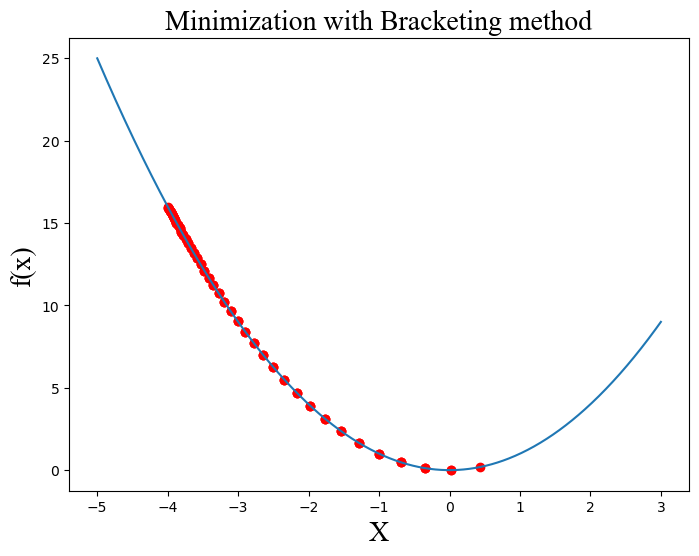

In [3]:
f1 = lambda x: abs(x)
f2 = lambda x: x**2
f3 = lambda x: max(-x**3,x**2-150)

x_init = -4
min_, max_ = Bracketing(f2,x_init,x_min = -5, x_max = 3, step = 1e-2, step_growth = 1.1)

if min_ == max_ == 0:
    print('The solution is not in provided [x_min,x_max]')
    print('minimum value is found in either ends of the range.')
else:
    print(f'{(round(min_,3),round(max_,3))}')

<h1>***************************************</h1>

<h1>Fibonacci search</h1>

<h4>Can stuck in local minima</h4>

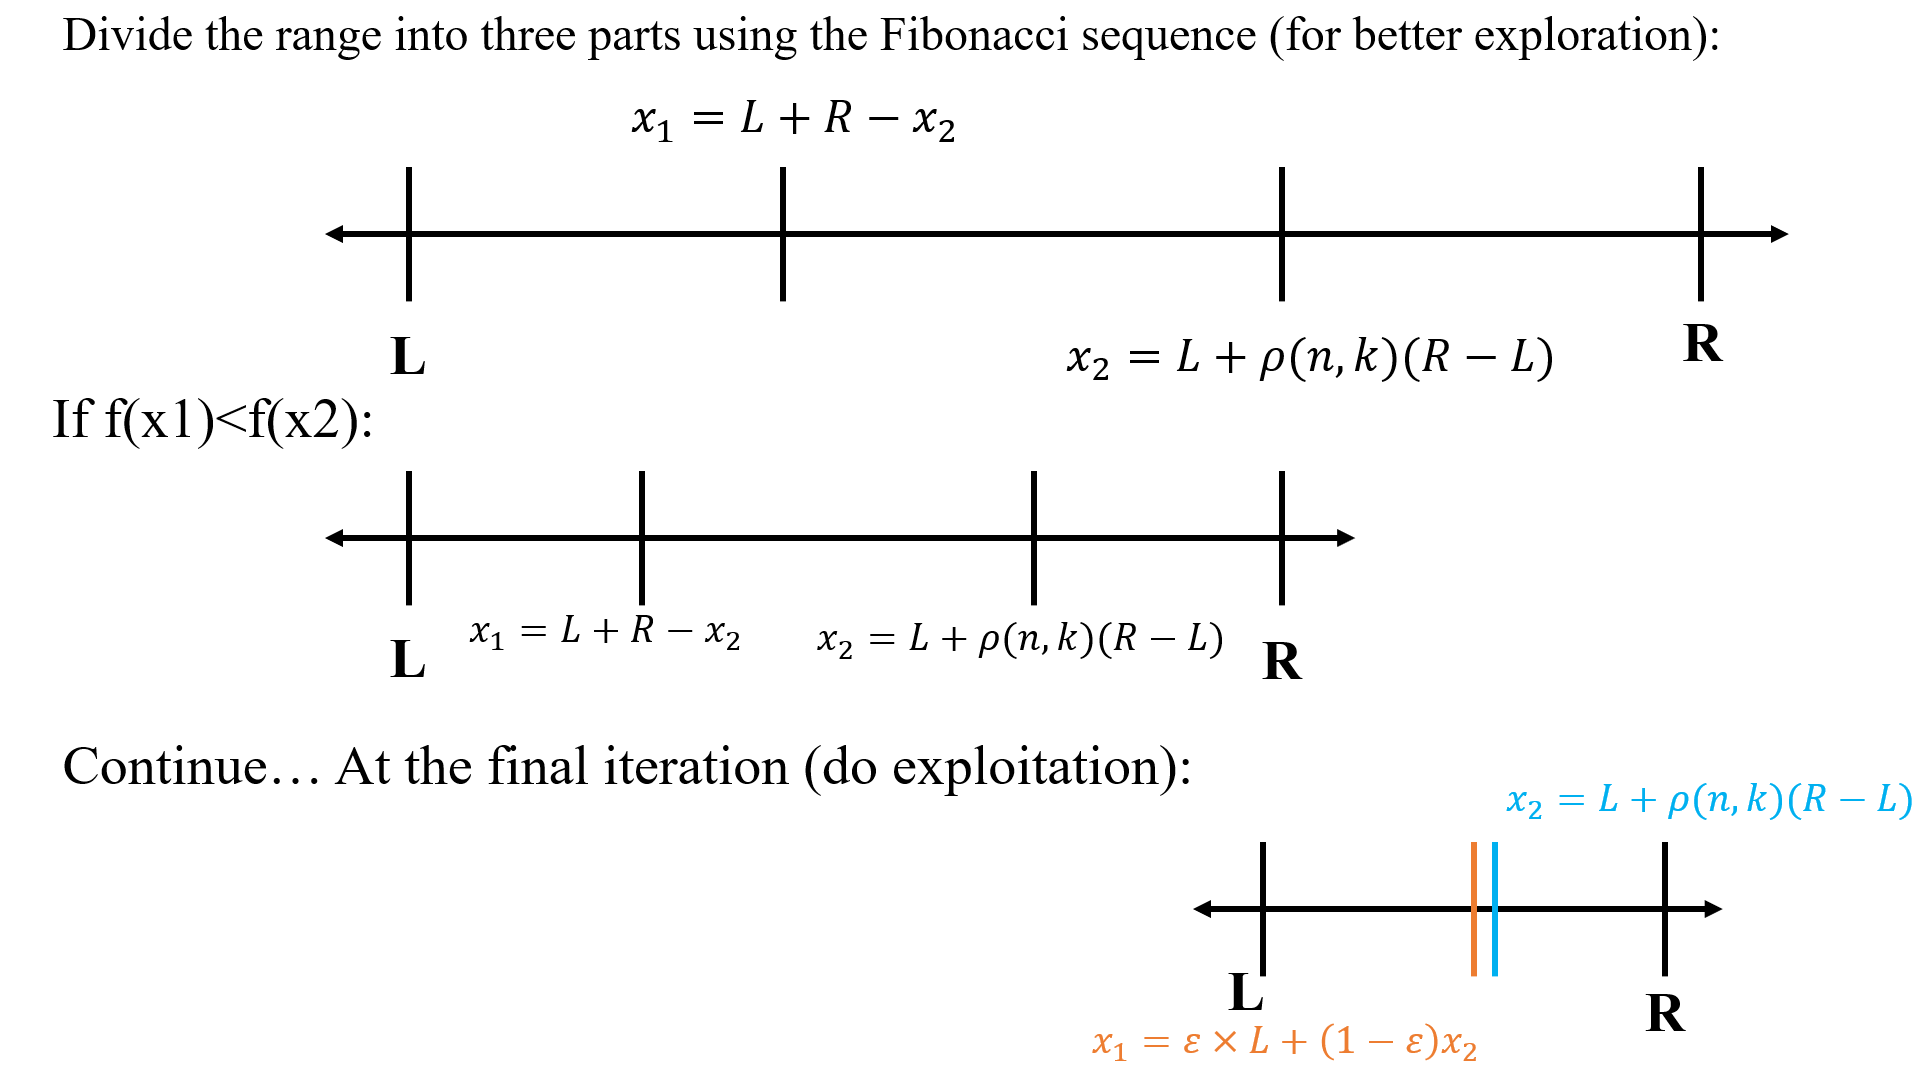

The algorithms attempts to break the search space into three parts and perform a more effective search in these parts.
It is executed for n iterations using n first terms of the fibonacci sequence. Ratio of two consecutive fibonacci term
determines how to divide the search space into three parts.

In [4]:
def Fibonacci_Search(f,L,R,n,eps):

    '''
        n: number of iterations = number of fibonacci sequence numbers
        L: left hand side of the range
        R: right hand side of the range
        (L,R): search in this range
        eps: at the nth (final) iteration find new point using eps instead of fibonacci ratio
    '''

    def rho(n,k):
        '''
            rho(n,k) = Fibo(n-k)/Fibo(n-k+1)
            
            this is the ratio of nth fibonacci number to (n+1)th fibonacci number
            this formula is derived from closed form of the fibonacci sequence
            
            it is possible to generate n terms of the fibonacci sequence and manually 
            calculate the ratios but this is a better method
        '''
        
        phi = (1+5**0.5)/2  # a constant number known as the golden ratio 
        s = (1-5**0.5)/(1+5**0.5)
        
        return (1-s**(n-k+1)) / (phi*(1-s**(n-k+2)))

    for k in range(1, n +1): # for n iterations, k should start from 1 since we need it in rho
        
        x2 = L + rho(n,k) * (R-L) # find x2
        
        # find x1 using x2
        if k == n:
            '''
               at the final iteration, instead of using fibonacci ratios, 
               use epsilon to remove maximum part of the search space
            ''' 
            x1 = eps*L + (1-eps)*x2
        else:
            x1 = L + R - x2

        fx1, fx2 = f(x1), f(x2)

        if fx1 < fx2: # x1 is always on the left of x2 (x1<x2) so the right changes to x2
            # L = L (no change)
            R = x2
        else: # fx2 < fx1
            L = x1
            # R = R (no change)

    return (L,R)

<h3>Using Fibonacci search</h3>

0.7692307692307694 0.9230769230769232


Text(0, 0.5, 'f(x)')

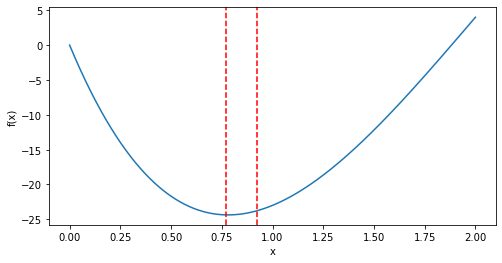

In [5]:
f = lambda x: x**4 - 14*x**3 + 60*x**2 - 70*x
L,R = 0,2
n = 6
eps=0.01

L_final,R_final = Fibonacci_Search(f,L,R,n,eps)

print(L_final,R_final)

plt.figure(figsize=(8,4))
x_plot = np.linspace(L,R,1000)
plt.plot(x_plot, f(x_plot))
plt.axvline(L_final, color = 'red', linestyle='--')
plt.axvline(R_final, color = 'red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')

<h1>***************************************</h1>

<h1>Golden section search</h1>

<h4>Can stuck in local minima</h4>

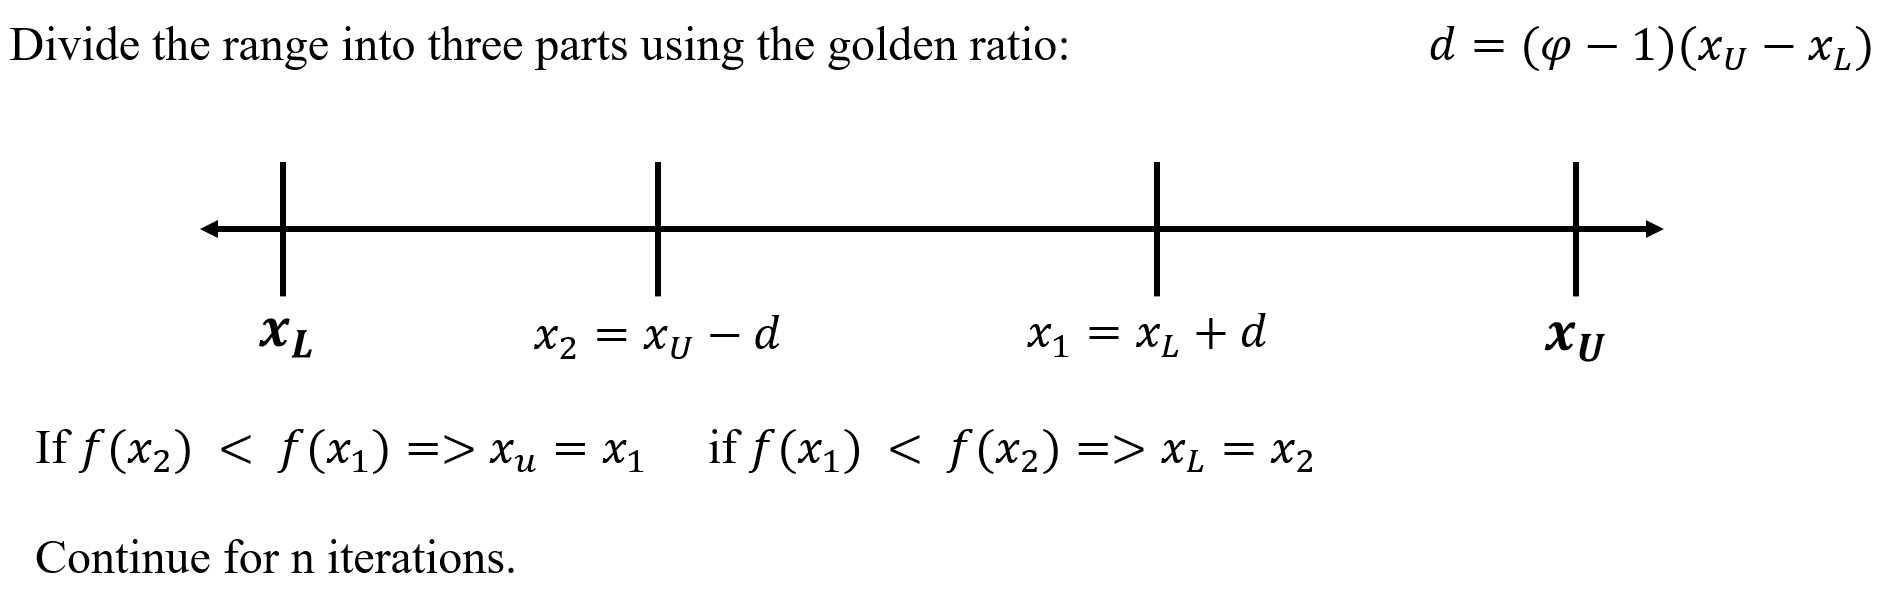

Golden section search uses the golden ratio (limit of fibonacci ratios or Fn+1/Fn when n goes to infinity) to divide the
search space into three parts. Since there is no fibonacci sequence, there is no limit on the number of iterations.

In [6]:
def Golden_Section_Search(f, xL, xU, num_iter):
    
    phi = (5**0.5 + 1)/2
    for i in range(num_iter):
        d = (phi - 1)*(xU - xL)
        x1 = xL + d
        x2 = xU - d
        # always => xL < x2 < x1 < xU
        
        fx1, fx2 = f(x1), f(x2)
        
        if fx1 < fx2:
            # the answer is not less than x2 for sure so xL = x2
            xL = x2
        else:
            # fx1 > fx2 which means that the answer is not greater that x1 so xU = x1
            xU = x1
    
    return (xL,xU)

<h3>Using Golden section search</h3>

1.3466179497939021 1.509230324909569


Text(0, 0.5, 'f(x)')

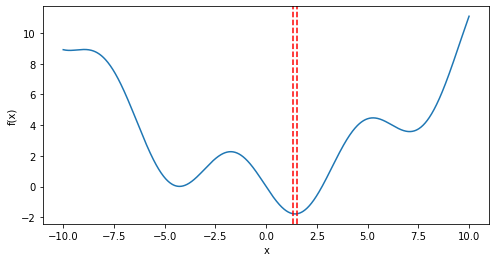

In [7]:
f = lambda x: 0.1 * x**2 - 2 * np.sin(x)

xL = -10
xU = 10
num_iter = 10
xL_final, xU_final = Golden_Section_Search(f, xL, xU, num_iter)

print(xL_final,xU_final)

plt.figure(figsize=(8,4))
x_plot = np.linspace(xL,xU,1000)
plt.plot(x_plot, f(x_plot))
plt.axvline(xL_final, color = 'red', linestyle='--')
plt.axvline(xU_final, color = 'red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')

<h1>***************************************</h1>

<h1>Quadratic fit search</h1>

<h4>Can stuck in local minima</h4>

Quadratic fit search fits a surrogate quadratic model on (x,f(x)) points and finds the minimum point of the surrogate
(quadratic) function using df/dx=0. This point is used to update the xs and then a new quadratic function is fitted. The
process is repeated for n iterations or until the derivetive root becomes close enough to the middle value in x list.

In [8]:
def Quadratic_Fit_Search(f,x,accuracy,plot_best_sols = True):
    """
        f:          the input function
        x:          list of three initial guesses
        accuracy:   the answer accuracy (the less, the more accurate)
    """
    Sols = []
    iteration = 0
    diff = 1
    while diff > accuracy:
    
        y = list(map(f,x))
        
        # fits a0 + a1 x1 + a2 x**2 to the (x,y) points
        # since there are anly three points and it is a quadratic function,
        # it will be a perfect fit with zero error
        Coefs = np.polynomial.polynomial.polyfit(x,y,deg = 2)
        
        # derivetive_root = -a1/(2*a2)
        Derivative_Root = -Coefs[1]/(2*Coefs[2])
        
        if Derivative_Root > x[1]:
            diff = abs(Derivative_Root-x[1])
            x = [x[1],Derivative_Root,x[2]]
        else:
            diff = abs(Derivative_Root-x[1])
            x = [x[0],Derivative_Root,x[1]]
        
        Sols.append(x[1])
        
        iteration += 1
    
    if plot_best_sols:
        plt.figure(figsize = (6,4), dpi = 120)
        plt.plot(range(iteration),list(map(f,Sols)))
        plt.title('Quadratic fit search',fontname = 'Times New Roman', size = 20)
        plt.xlabel('Iteration', size = 20, fontname = 'Times New Roman')
        plt.ylabel('Minimum', size = 20, fontname = 'Times New Roman')
    
    return x[1],f(x[1]),Sols

<h3>Using quadratic fit search</h3>

Minimizaer = 1.4276
Minimum = -1.7757


Text(0, 0.5, 'f(x)')

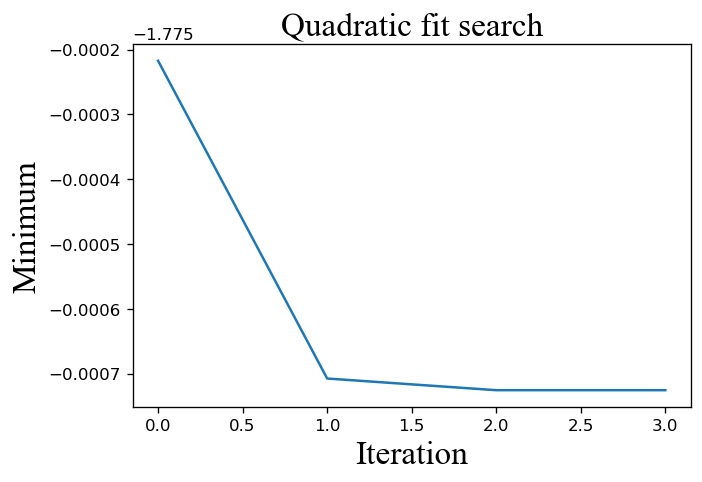

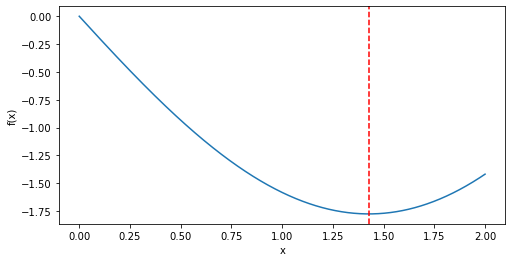

In [9]:
f = lambda x: x**4 - 14*x**3 + 60*x**2 - 70*x
g = lambda x: 0.1 * x**2 - 2 * np.sin(x)

x = [0,1,2]
accuracy = 0.001
Minimizer, Minimum, Sols = Quadratic_Fit_Search(g,x,accuracy)

print(f'Minimizaer = {round(Minimizer,4)}')
print(f'Minimum = {round(Minimum,4)}')

plt.figure(figsize=(8,4))
x_plot = np.linspace(x[0],x[2],1000)
plt.plot(x_plot, g(x_plot))
plt.axvline(Minimizer, color = 'red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')

<h1>***************************************</h1>

<h1>Shubert-Piyavskii method</h1>

<h4>Finds global minima</h4>

In [10]:
def subert_piyavskii(f,a,b,slope,tolerance, verbose=True):
    # this function is written for maximization. if you want to minimize f, maximize -f instead.

    # Initialization
    max_x_intersection = (a + b) / 2  # initial maximizer is assumed to be in the middle of the search space
    X = [a, b, max_x_intersection]  # Initial points: start, end, midpoint
    X.sort() # points should be sorted from start (smallest) to end (largest)

    error = float('inf')
    while error > tolerance:
        Maximizer_old = max_x_intersection
        max_y_intersection = float('-inf')

        fs = list(map(f,X))
        for i in range(1,len(X)): # repeat the process for every two xs inside the sorted list to find all intersections
            x_left, x_right = X[i - 1], X[i]
            f_left, f_right = fs[i-1], fs[i]
            
            # solve a system of two linear equations to find where two lines:
            # with +slope and (x_left,f_left)
            # with -slope and (x_right,f_right)
            # cross each other
            y = 0.5 * (f_left + f_right + slope * (x_right - x_left)) # intersection y value
            x = (y - f_left + slope * x_left) / slope # intersection x value

            if y > max_y_intersection: # if y is greater than previous max y values
                max_y_intersection = y # store it as the new max
                max_x_intersection = x # store its x value as well
        
        # difference between the intersection and actual function value
        error = abs( max_y_intersection - f(max_x_intersection) ) 
        
        if verbose:
            print('===============================')
            print(f'Error = {round( error ,5)}')
            print(f'Maximizer = {round(max_x_intersection,5)}')

        X.append(max_x_intersection)
        X = sorted(set(X))  # Use set to avoid duplicates
        
    return max_x_intersection, f(max_x_intersection)

<h3>using shubert-piyavskii method</h3>

maximum value = 749.08
maximizer value = 5.9012


Text(0, 0.5, 'f(x)')

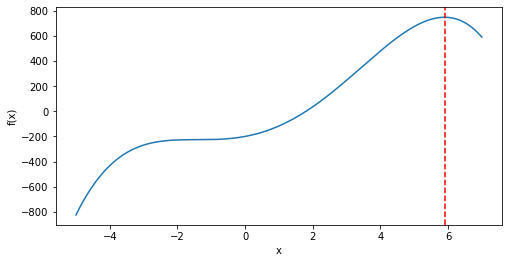

In [11]:
f = lambda x: -(x**4 - 4*x**3 - 30*x**2 - 50*x + 200) #-(0.1 * x**2 - 2 * np.sin(x))

a, b = -5, 7 # search space
slope = 300  # Lipschitz constant (slope of lines used to find intersections)
tolerance = 0.05  # Convergence threshold

maximizer, maximum = subert_piyavskii(f,a,b,slope,tolerance, verbose=False)

print(f'maximum value = {round(maximum,4)}')
print(f'maximizer value = {round(maximizer,4)}')

plt.figure(figsize=(8,4))
x_plot = np.linspace(a,b,1000)
plt.plot(x_plot, f(x_plot))
plt.axvline(maximizer, color = 'red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')

To do:

standardization:
* unify the graphs
* unify the notations (for some algs a,b are used while for the others L,R and xL,xU)

<h1>***************************************</h1>

<h1>Gradient descent</h1>

<h4>Can stuck in local minima</h4>

Five versions will be implemented:

* constant step size
* decaying step size
* optimum step size
* first wolf condition
* first and second wolf conditions

In [12]:
def gradient_descent(func,gradient_func,x_init,step_size,esp, decay_rate, max_iter, verbose= True):
    
    # set decay_rate to None if you want to use a constant step_size
    
    funcs = []
    x = x_init
    funcs.append(func(x))
    diff = np.inf
    iteration = 0
    while diff > esp:
        
        if iteration == max_iter:
            break
        iteration += 1
        
        y1 = func(x)
        x = x - step_size*gradient_func(x)
        y2 = func(x)
        diff = abs(y1-y2)
        funcs.append(y2)
        
        if decay_rate:
            step_size = step_size * decay_rate
        
        if verbose:
            print(f'Difference = {diff} | x = {x}')
            
    return x, funcs

<h3>using gradient descent method</h3>

Minimizer = [1.99938819 2.99908228]
minimum = -3.9999987834697652


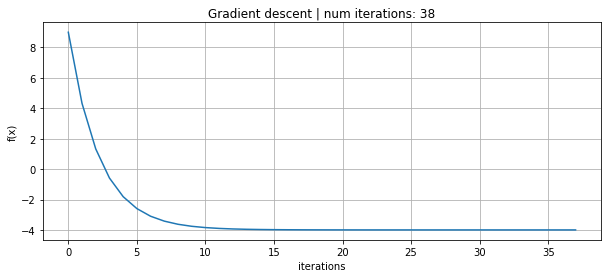

In [13]:
def func(x):
    return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1] + 9  # min = -4 at [2,3]
    # return x[0]**2 + x[1]**2  # min = 0 at [0,0]
    # return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2 # min = 0 at [3,0.5]
    # return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2 # min = 0 at [1,3]

def gradient_func(x):
    return np.array([2*x[0] - 4, 2*x[1] - 6])
    # return np.array([2*x[0], 2*x[1]])
    # return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
    #                 2*(1.5-x[0]+x[0]*x[1])*x[0] + 2*(2.25-x[0]+x[0]*x[1]**2)*(2*x[0]*x[1]) + 2*(2.625-x[0]+x[0]*x[1]**3)*(3*x[0]*x[1]**2)])
    # return np.array([2*(x[0]+2*x[1]-7) + 2*(2*x[0]+x[1]-5)*2,
    #                  2*(x[0]+2*x[1]-7)*2 + 2*(2*x[0]+x[1]-5)])

x_init = [0,0]
step_size = 0.1
esp = 1e-6
decay_rate = 0.999
max_iter = 200
minimizer, funcs = gradient_descent(func,gradient_func,x_init,step_size,esp, decay_rate, max_iter, verbose= False)

print(f'Minimizer = {minimizer}')
print(f'minimum = {func(minimizer)}')

plt.figure(figsize=(10,4))
plt.plot(funcs)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title(f'Gradient descent | num iterations: {len(funcs)}')
plt.grid()

<h1>***************************************</h1>

<h2>Gradient descent with optimum step size</h2>

This algorithm uses Quadratic fir search to find an optimum step size such that the new x minimizes f(x) in the provided direction. In previous methods we used a constant or decaying step size to minimize x but here we are trying to find the best step size.

The problem of finding the best step size is a univariate optimization that can be solved using numerical methods like quadratic fit search, golden section search, shubert-piyavskii, or even another gradient descent using numerical approaximation of the derivetive. This implementation uses numerical methods.

In [14]:
def gradient_descent_with_opt_step_size(func, gradient_func, x_init, eps,max_iter, step_opt_alg="QFS", verbose= True):
    # range of search for step size is considered to be between 0 and 1
    
    def func_step_size(step_size):
        return func(x - step_size * direction)
    
    funcs = []
    x = x_init
    funcs.append(func(x))
    diff = np.inf
    
    if verbose:
        print(f'Difference = {diff} | x = {x}')
    
    iteration = 0
    while diff > eps:
        
        if iteration == max_iter:
            break
        iteration += 1
        
        y1 = func(x)
        
        ############## Main algorithm
        
        direction = gradient_func(x) # find the direction of movement
        
        # find the best step size to move in the specified direction
        
        if step_opt_alg == "QFS":
        
            opt_step_size, _, _ = Quadratic_Fit_Search(func_step_size,x=[0,0.5,1],accuracy=0.0001,
                                                       plot_best_sols = False)
        elif step_opt_alg == "GSS":
        
            xL_final, xU_final = Golden_Section_Search(func_step_size, xL = 0, xU = 1, num_iter = 100)
            opt_step_size = (xL_final + xU_final) / 2
        
        x = x - opt_step_size * direction # find new x value using the best step size and direction
        
        ##############
        
        y2 = func(x)
        funcs.append(y2)
        
        diff = abs(y1-y2)
        
        if verbose:
            print(f'Difference = {diff} | x = {x}')
    
    return x, funcs

<h3>using gradient descent with optimum step size method</h3>

As can be seen there is no need to initialize the step size and the optimum x is found using less gradient descent iterations which proves the effectiveness of this method.

Difference = inf | x = [5, 4]
Difference = 3175.2279695401958 | x = [ 2.60922322 -4.94655774]
Difference = 103808.72496586828 | x = [-1.89258051  2.02984037]
Difference = 107.85894881438884 | x = [-1.05768839 -0.54566843]
Difference = 32.99340643454273 | x = [2.43974053 0.5263709 ]
Difference = 0.5732218480322935 | x = [2.49573428 0.34371363]
Difference = 0.0741500589152789 | x = [2.96730467 0.49536648]
Difference = 0.0002966583194515725 | x = [2.96839212 0.49198502]
Difference = 9.314887528823273e-05 | x = [2.9852643  0.49760691]
Difference = 3.920238222471033e-05 | x = [2.98566871 0.49639322]
Difference = 1.7882727787534874e-05 | x = [2.99305462 0.49885545]
Difference = 8.165477761332932e-06 | x = [2.99323848 0.49830392]
Difference = 3.8610833479697655e-06 | x = [2.99666882 0.4994476 ]
Difference = 1.8247179256115427e-06 | x = [2.99675564 0.49918721]
Difference = 7.774170600587877e-07 | x = [2.99819918 0.49968406]
Minimizer = [2.99819918 0.49968406]
minimum = 9.146425893201006e-07


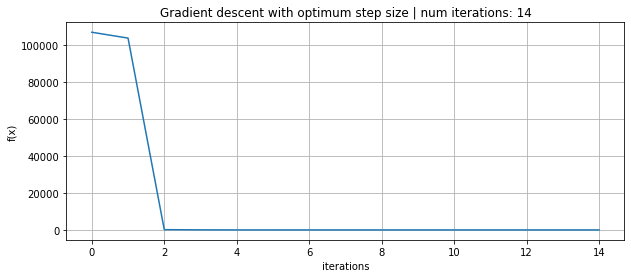

In [15]:
def func(x):
    # return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1] + 9  # min = -4 at [2,3]
    # return x[0]**2 + x[1]**2  # min = 0 at [0,0]
    return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2 # min = 0 at [3,0.5]
    # return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2 # min = 0 at [1,3]

def gradient_func(x):
    # return np.array([2*x[0] - 4, 2*x[1] - 6])
    # return np.array([2*x[0], 2*x[1]])
    return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
                     2*(1.5-x[0]+x[0]*x[1])*x[0] + 2*(2.25-x[0]+x[0]*x[1]**2)*(2*x[0]*x[1]) + 2*(2.625-x[0]+x[0]*x[1]**3)*(3*x[0]*x[1]**2)])
    # return np.array([2*(x[0]+2*x[1]-7) + 2*(2*x[0]+x[1]-5)*2,
    #                  2*(x[0]+2*x[1]-7)*2 + 2*(2*x[0]+x[1]-5)])

x_init = [5,4]
eps = 1e-6
max_iter = 200
minimizer, funcs = gradient_descent_with_opt_step_size(func, gradient_func, x_init, eps, 
                                                       max_iter, step_opt_alg="QFS", verbose= True)

print(f'Minimizer = {minimizer}')
print(f'minimum = {func(minimizer)}')

plt.figure(figsize=(10,4))
plt.plot(funcs)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title(f'Gradient descent with optimum step size | num iterations: {len(funcs)-1}') # minus 1 to exclude initial point
plt.grid()

<h1>***************************************</h1>

<h2>Hyper-gradient descent</h2>

<h1>***************************************</h1>

<h2>Gradient descent with first wolf condition</h2>

instead of finding the optimum step size, it is possible to find a step size which is sufficeintly good but not necessarily optimum. We can check whether thee step size is sufficiently good using **first wolf condition** also known as the **armijo rule**. This is called an approximate line search method.

right hand side of the armijo rule is the first order taylor approximation around the point (x_old + step_size * d) since:
f(x_old + step_size * d) ~= f(x_old) + step_size * grad(x_old).d | but we have a first_wolf_coef to relax the first order taylor approximationa and make sure that step size is not too large so that we jump over the minimum. 

In [16]:
def gradient_descent_with_first_wolf_condition(func, gradient_func, x_init, step_size_init, first_wolf_coef=1e-4, 
                                               update_strategy='reset', decay_rate = 0.5, growth_rate = 1.75,
                                               step_size_init_weight = 0.95, eps = 1e-6, max_iter = 200):
    '''
        func: function to be minimize
        gradient_func: gradient vector
        x_init: initial point to start optimization process from (list)
        step_size_init: initial step size value (positive)
        first_wolf_coef: constant coefficient to be used in the first wolf condition or armijo rule (0,1) typically 1e-4
        update_strategy:
            'reset':  if armijo rule is ok, reset the current step size to to step_size_init
            'growth': if armijo rule is ok, increase step size by multiplying it to growth_rate
            'mix':    if armijo rule is ok, update step size using weighted average of initial and current value such that
                      step_size = step_size_init_weight * step_size_init + (1-step_size_init_weight) * step_size
        decay_rate: if armijo rule is not ok, reduce step_size by multiplying it to the decay_rate
        growth_rate: used when update_strategy == 'growth'. ignored in other cases.
        step_size_init_weight: used when update_strategy == 'mix'. ignored in other cases.
        eps: stopping criteria for gradient value.
        max_iter: maximum number of iterations to prevent infinite loop.
    '''
    funcs = []
    
    x_old = np.array(x_init)   # initialize x
    funcs.append(func(x_old))  # store initial function value
    step_size = step_size_init # initialize step_size
    
    diff = np.inf
    iteration = 0
    while diff > eps:
        
        f_x_old = func(x_old)
        grad_old = gradient_func(x_old)
        direction = -grad_old
        while True:

            x_new = x_old + step_size * direction
            if func(x_new) <= f_x_old + first_wolf_coef * step_size * np.dot(grad_old,direction):
                
                # first wolf condition(armijo rule): OK => accept x_new
                x_old = x_new

                if update_strategy == 'reset':
                    # update step_size to its initial value
                    step_size = step_size_init          
                elif update_strategy == 'growth':
                    # update step_size by increasing it
                    step_size = step_size * growth_rate 
                else: # update_strategy == 'mix'
                    # update step size using weighted average of initial and current value
                    step_size = step_size_init_weight*step_size_init + (1-step_size_init_weight)*step_size

                break # end the inner while loop

            else:
                
                # first wolf condition(armijo rule): NOT OK => do not accept x_new AND reduce the step size
                step_size = step_size * decay_rate
        
        # store new function value
        funcs.append(func(x_old))
        
        # compute gradient value to see if it reached 0
        diff = np.linalg.norm(gradient_func(x_old))
        
        if iteration >= max_iter:
            break # end the outer while loop
        else:
            iteration += 1
    
    return x_old, funcs

<h3>using gradient descent with first wolf condition (armijo rule)</h3>

Alternatively known as approximate line search

Minimizer = [2. 3.]
minimum = -4.0


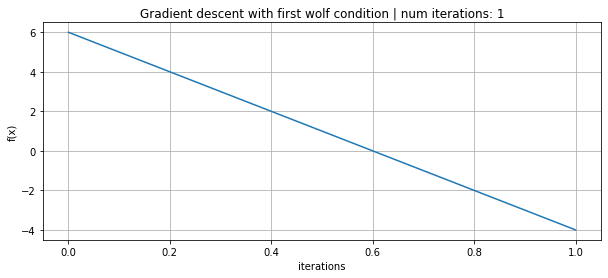

In [17]:
def func(x):
    return x[0]**2 + x[1]**2 - 4*x[0] - 6*x[1] + 9  # min = -4 at [2,3]
    # return x[0]**2 + x[1]**2  # min = 0 at [0,0]
    # return (1.5-x[0]+x[0]*x[1])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2 # min = 0 at [3,0.5]
    # return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2 # min = 0 at [1,3]

def gradient_func(x):
    return np.array([2*x[0] - 4, 2*x[1] - 6])
    # return np.array([2*x[0], 2*x[1]])
    # return np.array([2*(1.5-x[0]+x[0]*x[1])*(-1+x[1]) + 2*(2.25-x[0]+x[0]*x[1]**2)*(-1+x[1]**2) + 2*(2.625-x[0]+x[0]*x[1]**3)*(-1+x[1]**3),
    #                  2*(1.5-x[0]+x[0]*x[1])*x[0] + 2*(2.25-x[0]+x[0]*x[1]**2)*(2*x[0]*x[1]) + 2*(2.625-x[0]+x[0]*x[1]**3)*(3*x[0]*x[1]**2)])
    # return np.array([2*(x[0]+2*x[1]-7) + 2*(2*x[0]+x[1]-5)*2,
    #                  2*(x[0]+2*x[1]-7)*2 + 2*(2*x[0]+x[1]-5)])


x_init = [5,4]
x, funcs = gradient_descent_with_first_wolf_condition(func, gradient_func, x_init, step_size_init=1, first_wolf_coef=1e-4, 
                                                      update_strategy='mix', decay_rate = 0.5, growth_rate = 1.75,
                                                      step_size_init_weight = 0.95, eps = 1e-6, max_iter = 500)

print(f'Minimizer = {x}')
print(f'minimum = {func(x)}')

plt.figure(figsize=(10,4))
plt.plot(funcs)
plt.xlabel('iterations')
plt.ylabel('f(x)')
plt.title(f'Gradient descent with first wolf condition | num iterations: {len(funcs)-1}') # minus one to exclude initial point
plt.grid()

<h1>***************************************</h1>

<h2>Gradient descent with first and second wolf conditions</h2>